# Calibration & Fusion

### Score calibration

In [1]:
import numpy as np
#load scores_1
scores_1 = np.load("./Data/scores_1.npy")
print(f"Shape of scores_1: {scores_1.shape}")
#load scores_2
scores_2 = np.load("./Data/scores_2.npy")
print(f"Shape of scores_2: {scores_2.shape}")

Shape of scores_1: (2000,)
Shape of scores_2: (2000,)


In [2]:
#load LVAL, so validation labels
LVAL = np.load("./Data/labels.npy")
print(f"Shape of LVAL: {LVAL.shape}")

Shape of LVAL: (2000,)


minDCF for scores_1: 0.20428671869296186, DCF: 0.29772502472799206
minDCF for scores_2: 0.31056257807194676, DCF: 0.3280816978854441


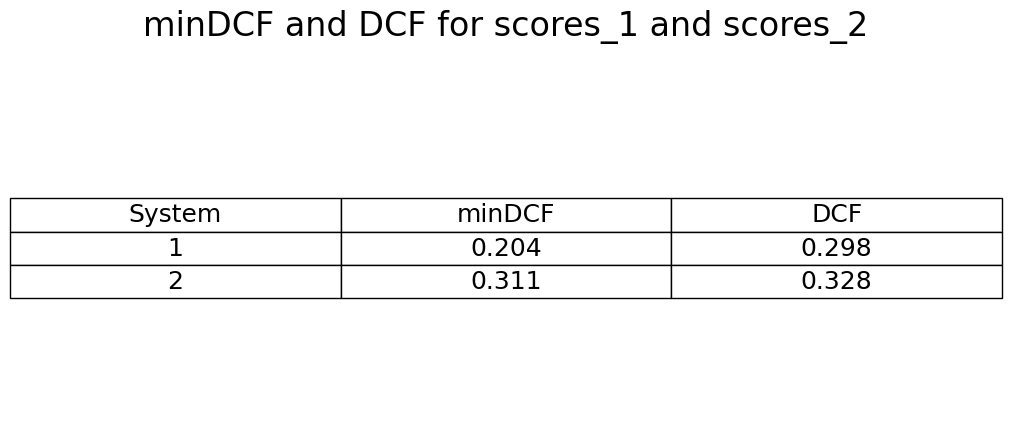

In [7]:
# Compute minDCF, actDCF for these two scores
from decisionModelsEvaluation import computeEmpiricalBayesRisk_Normalized, computeMinEmpiricalBayesRisk_Normalized, plotBayesErrorPlots

appPriorTrue = 0.2 #target app prior for class true
minDCF_1 = computeMinEmpiricalBayesRisk_Normalized(scores_1, LVAL, appPriorTrue, 1.0, 1.0)
DCF_1 = computeEmpiricalBayesRisk_Normalized(scores_1, LVAL, appPriorTrue, 1.0, 1.0)

minDCF_2 = computeMinEmpiricalBayesRisk_Normalized(scores_2, LVAL, appPriorTrue, 1.0, 1.0)
DCF_2 = computeEmpiricalBayesRisk_Normalized(scores_2, LVAL, appPriorTrue, 1.0, 1.0)

print(f"minDCF for scores_1: {minDCF_1}, DCF: {DCF_1}")
print(f"minDCF for scores_2: {minDCF_2}, DCF: {DCF_2}")

#table
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

table_data = [
    ["System", "minDCF", "DCF"],
    ["1", f"{minDCF_1:.3f}", f"{DCF_1:.3f}"],
    ["2", f"{minDCF_2:.3f}", f"{DCF_2:.3f}"]
]

table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(2, 2)
plt.title("minDCF and DCF for scores_1 and scores_2", fontsize=24, pad=20)
plt.show()

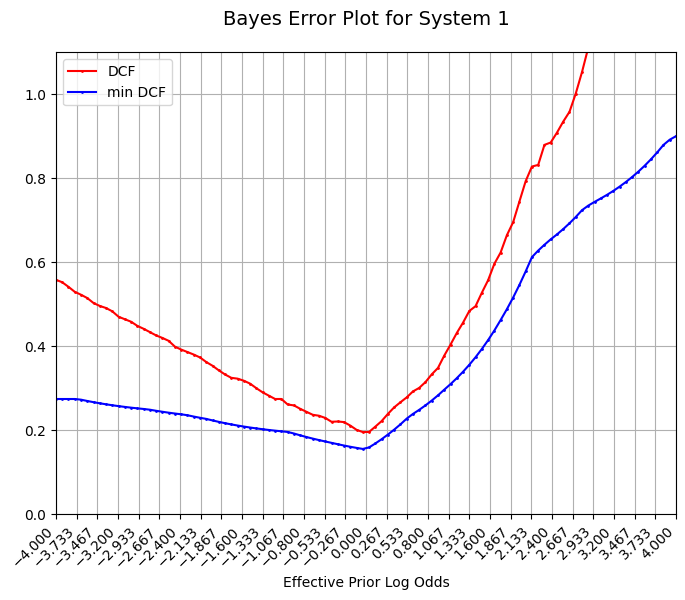

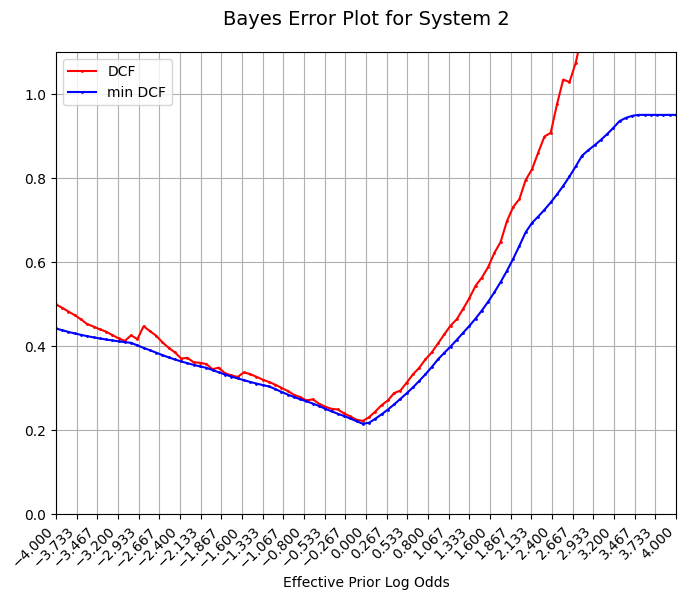

In [10]:
#plot bayes error plots
effPriorLogOdds = np.linspace(-4, 4, 100)
plotBayesErrorPlots(effPriorLogOdds, scores_1, LVAL, title="Bayes Error Plot for System 1")
plotBayesErrorPlots(effPriorLogOdds, scores_2, LVAL, title="Bayes Error Plot for System 2")

We can observe reasonably good calibration for system 2 for low target
prior applications, but bad calibration for high target prior application and overall bad calibration for
system 1. We also observe that system 1 has better **discrimination potential** (because it has a lower $\text{min DCF}$!) than system 2, but the
calibration loss of system 1 brings its performance close to that of system 2.

### Calibration — Single-fold approach

To estimate the calibration parameters we require a labeled training set (calibration training set). To
assess the quality of the transformation, we can then compute actual and minimum DCFs of calibrated
scores. To avoid bias in our results, the calibration training set and the calibration validation set should
be different. We start analyzing a simple set-up based on our usual split of training-validation samples.
In this case, the split is applied to our scores dataset (which may, for example, be one of the validation
sets we employed in previous laboratories). <br>
**For this laboratory, we simply take every third score for calibration training, and the remaining two thirds as calibration validation.**

In [18]:
#split the scores into two sets, calibration set and calibration validation set
SCAL1, SVAL1 = scores_1[::3], np.hstack([scores_1[1::3], scores_1[2::3]])
SCAL2, SVAL2 = scores_2[::3], np.hstack([scores_2[1::3], scores_2[2::3]])
print(f"Shape of SCAL1: {SCAL1.shape}, SVAL1: {SVAL1.shape}")
print(f"Shape of SCAL2: {SCAL2.shape}, SVAL2: {SVAL2.shape}")

LCAL, LVAL = LVAL[::3], np.hstack([LVAL[1::3], LVAL[2::3]]) # Labels
print(f"Shape of LCAL: {LCAL.shape}, LVAL: {LVAL.shape}")

Shape of SCAL1: (667,), SVAL1: (1333,)
Shape of SCAL2: (667,), SVAL2: (1333,)
Shape of LCAL: (667,), LVAL: (1333,)


SCAL1, SVAL1 are the calibration training and calibration validation set for system 1, and similarly for
SCAL1, SVAL1 and system 2. <br>
Since the calibration validation set is a subset of the whole dataset of scores, we start re-evaluating the
performance of the systems on this new validation set. <br>
NOTE: we cannot directly compare the results with those of the previous section, since we changed the
validation set. <br>
So, we recompute actual $\text{DCF}$ (**there's no need to recompute $\text{min DCF}$, as affine transformations do not change it!**) and plot again the Bayes Error Plots for both system:

DCF for System 1 (raw scores, calibration validation set): 0.274
DCF for System 2 (raw scores, calibration validation set): 0.329
minDCF for System 1 (raw scores, calibration validation set): 0.182
minDCF for System 2 (raw scores, calibration validation set): 0.311


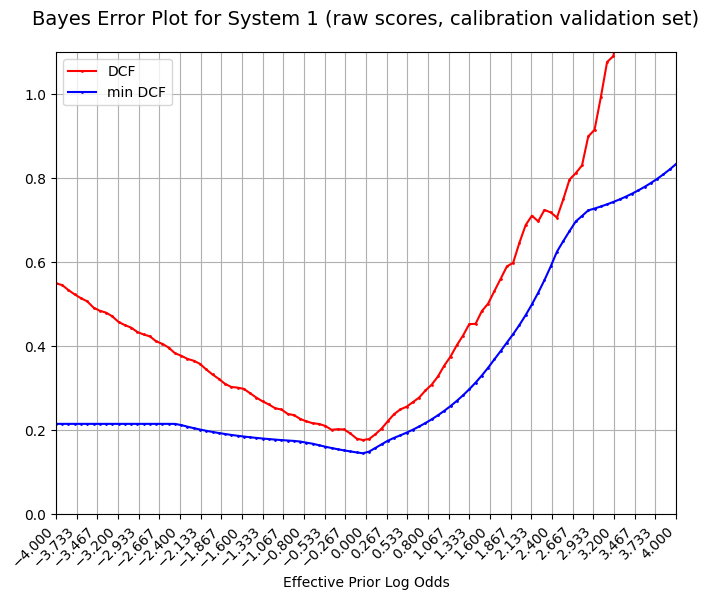

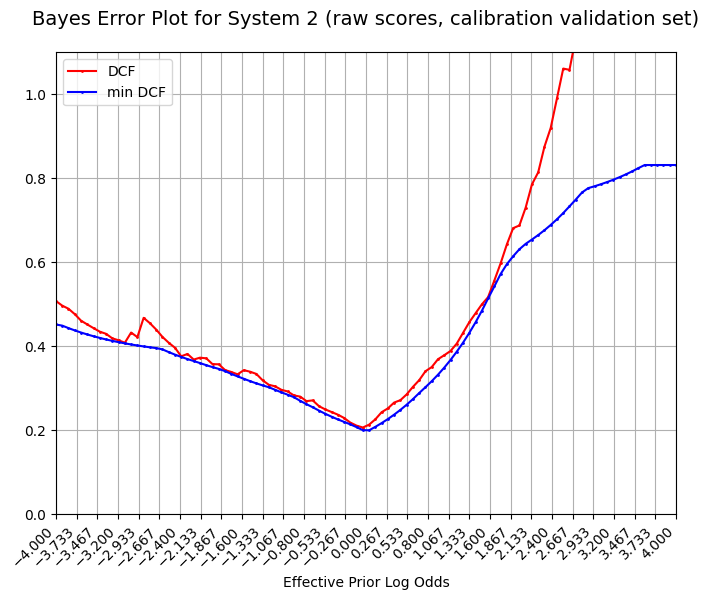

In [25]:
DCF_1_val = computeEmpiricalBayesRisk_Normalized(SVAL1, LVAL, appPriorTrue, 1.0, 1.0)
DCF_2_val = computeEmpiricalBayesRisk_Normalized(SVAL2, LVAL, appPriorTrue, 1.0, 1.0)
#minDCF are the same! Because they are not infuence by affine transformations
minDCF_1_val = computeMinEmpiricalBayesRisk_Normalized(SVAL1, LVAL, appPriorTrue, 1.0, 1.0)
minDCF_2_val = computeMinEmpiricalBayesRisk_Normalized(SVAL2, LVAL, appPriorTrue, 1.0, 1.0)
print(f"DCF for System 1 (raw scores, calibration validation set): {DCF_1_val:.3f}")
print(f"DCF for System 2 (raw scores, calibration validation set): {DCF_2_val:.3f}")
print(f"minDCF for System 1 (raw scores, calibration validation set): {minDCF_1_val:.3f}")
print(f"minDCF for System 2 (raw scores, calibration validation set): {minDCF_2_val:.3f}")

#bayes error plots for calibration set, raw scores
plotBayesErrorPlots(effPriorLogOdds, SVAL1, LVAL, title="Bayes Error Plot for System 1 (raw scores, calibration validation set)")
plotBayesErrorPlots(effPriorLogOdds, SVAL2, LVAL, title="Bayes Error Plot for System 2 (raw scores, calibration validation set)")


We now train a **Prior-weighted, non regularized Logistic Regression model on the scores (considering them as samples) of the Calibration Set**. Then, after we estimated the best LR parameters $\alpha$, $\beta$, we can compute the following affine transformation to calibrate our raw (uncalibrated) scores:
$$
S_{cal} = f(S_u) = \alpha S_u + \beta - \log \frac{\pi_T}{1 - \pi_T}
$$
This is equal to:
$$
S_{cal} = \alpha S_u + \gamma \qquad \text{where} \quad \gamma = \beta - \log \frac{\pi_T}{1 - \pi_T}
$$
So, as said, we estimate these paramters using a prior weighted, non regularized Logistic Regresion model for the uncalibrated scores, which has the following objective,the average Loss Function:
$$
\mathcal{J}(\alpha, \beta) = \frac{1}{n} \sum_{i = 1}^n \xi_i \log \left( 1 + e^{-z_i \left( \alpha S_u + \beta\right)}\right) \qquad \text{where} \quad \xi_i =
\begin{cases}
\frac{\pi_T}{n_T} \quad \text{if } z_i = 1 \\[0.75em]
\frac{1- \pi_T}{1 - n_T} \quad \text{if } z_i = -1
\end{cases}
$$
So, since we just have two classes:
$$
\mathcal{J}(\alpha, \beta) = \frac{1}{n} \left[ \frac{\pi_T}{n_T} \sum_{i = 1 \mid c_i = H_T} \log \left( 1 + e^{- \left( \alpha S_u + \beta\right)}\right) 
+ \frac{1-\pi_T}{1-n_T} \sum_{i = 1 \mid c_i = H_F} \log \left( 1 + e^{\left( \alpha S_u + \beta\right)} \right)\right]
$$
Regularization in this case is not needed (i.e. $\lambda = 0$), because the scores are just **1-dimensional**, and if, like in this case, we have a sufficient quantity of samples (at least 100 we would say), **the risk of overfitting is fairly minimal**.

In [28]:
from mean_covariance import vcol, vrow

Shape of SCAL1_2D: (1, 667)
alpha: [0.93700255], beta: 0.3276692837797854
DCF for System 1 (calibrated scores, calibration validation set): 0.206


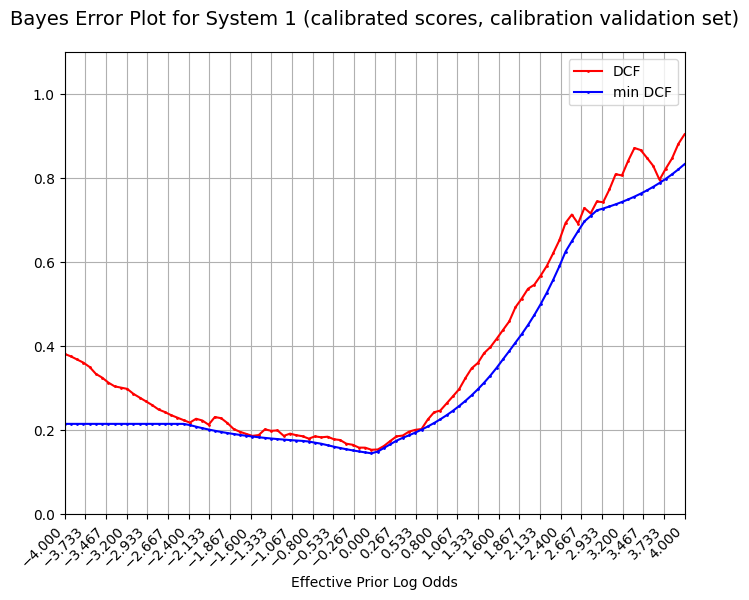

In [42]:
# CALIBRATION MODEL FOR SYSTEM 1
from LR import trainLogReg_PriorWeighted

"""
in the labs we assumed scores are 1-D arrays, whereas logistic regression works with 2-D arrays. In our case, we would need to reshape the scores to a 1 × n 2-D ndarray
before training the model
"""

#reshape scores to 2-D arrays
SCAL1_2D = vrow(SCAL1)
print(f"Shape of SCAL1_2D: {SCAL1_2D.shape}")
SVAL1_2D = vrow(SVAL1)
#we calibrate for prior true 0.2
pT = 0.2
#no regularitazion term, so lambda = l = 0
alpha_1, beta_1, _ = trainLogReg_PriorWeighted(SCAL1_2D, LCAL, l = 0, manual_grad=True, PriorTrue=pT)
print(f"alpha: {alpha_1}, beta: {beta_1}")

#now we construct the decision surface, linear
#these are the CALIBRATED SCORES
priorLogOdds = np.log(pT / (1 - pT))  # log odds for prior true
calibrated_SVAL1 = (alpha_1 @ SVAL1_2D + beta_1 - priorLogOdds).ravel() #ravel to go back to 1-D array (since SCAL1_2D, SVAL1_2D are 2-D arrays)
#we now use the Calibration Validation Set to compute the DCFfor the calibrated scores
DCF_1_calibrated = computeEmpiricalBayesRisk_Normalized(calibrated_SVAL1, LVAL, pT, 1.0, 1.0)
print(f"DCF for System 1 (calibrated scores, calibration validation set): {DCF_1_calibrated:.3f}")

#bayes error plot for calibrated scores of system 1
plotBayesErrorPlots(effPriorLogOdds, calibrated_SVAL1, LVAL, title="Bayes Error Plot for System 1 (calibrated scores, calibration validation set)")

Shape of SCAL2_2D: (1, 667)
alpha: [0.71925127], beta: -0.5922938929142205
DCF for System 2 (calibrated scores, calibration validation set): 0.336


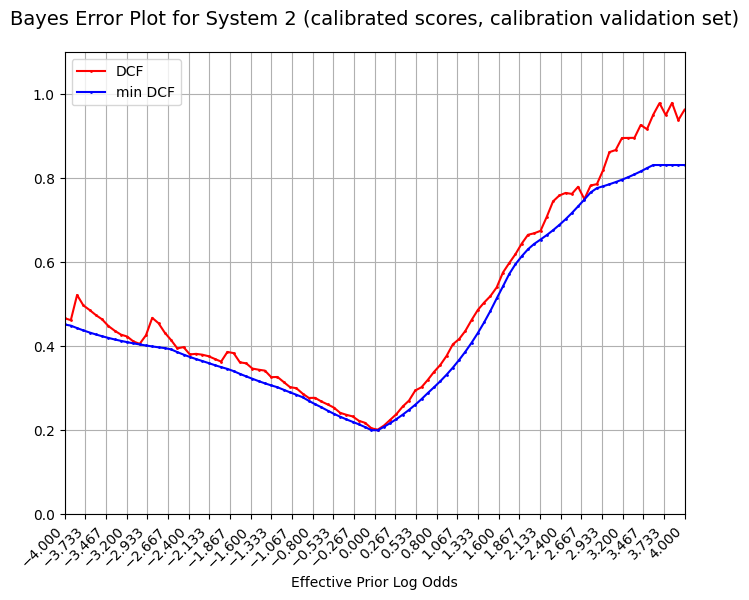

In [43]:
# CALIBRATION MODEL FOR SYSTEM 2
#reshape scores to 2-D arrays
SCAL2_2D = vrow(SCAL2)
print(f"Shape of SCAL2_2D: {SCAL2_2D.shape}")
SVAL2_2D = vrow(SVAL2)
#we calibrate for prior true 0.2
#no regularitazion term, so lambda = l = 0
alpha_2, beta_2, _ = trainLogReg_PriorWeighted(SCAL2_2D, LCAL, l = 0, manual_grad=True, PriorTrue=pT)
print(f"alpha: {alpha_2}, beta: {beta_2}")
#now we construct the decision surface, linear
priorLogOdds = np.log(pT / (1 - pT))  # log odds for prior true
calibrated_SVAL2 = (alpha_2 @ SVAL2_2D + beta_2 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#we now use the Calibration Validation Set to compute the DCF for the calibrated scores
DCF_2_calibrated = computeEmpiricalBayesRisk_Normalized(calibrated_SVAL2, LVAL, pT, 1.0, 1.0)
print(f"DCF for System 2 (calibrated scores, calibration validation set): {DCF_2_calibrated:.3f}")
#bayes error plot for calibrated scores of system 2
plotBayesErrorPlots(effPriorLogOdds, calibrated_SVAL2, LVAL, title="Bayes Error Plot for System 2 (calibrated scores, calibration validation set)")

### Calibration — Single-fold approach - Calibration on held-out Evaluation Set

Now we calibrate the scores for both system in an additional, held out Evaluation Set. <br>
For this, we must simply apply the trained model (so, with the parameters $\alpha$, $\beta$ estimated before) to the evaluation scores, and compute the metrics over the calibrated evaluation scores (**we must not train anything using the evaluation scores, in order not to add bias!**)

Shape of scores_eval_1: (1500,)
DCF for System 1 (calibrated scores, evaluation set): 0.225
minDCF for System 1 (calibrated scores, evaluation set): 0.205


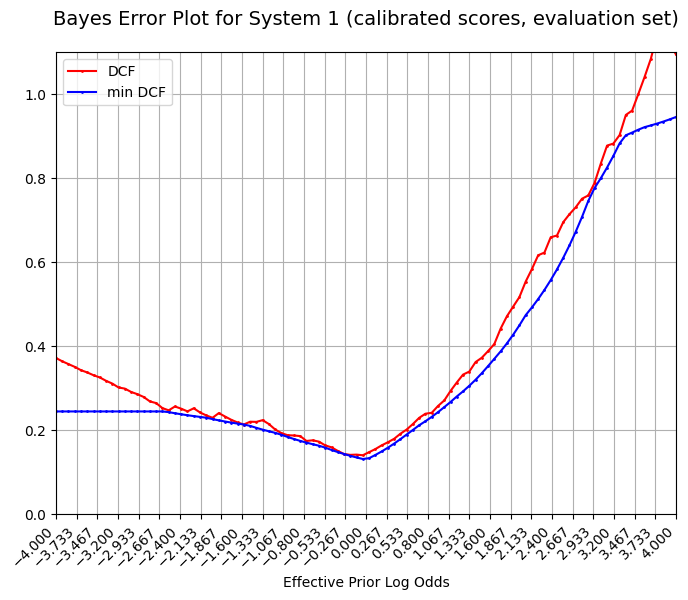

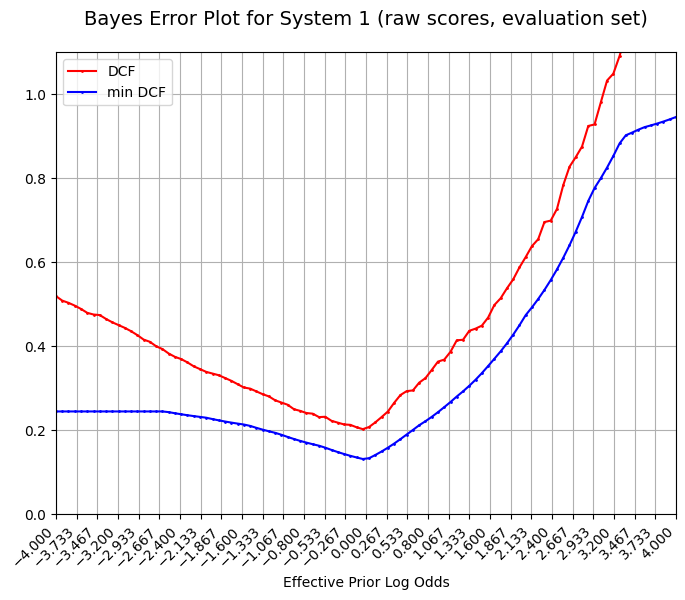

In [49]:
#apply the model on evaluation set

#SYSTEM 1 - EVAL SET CALIBRATION
#load evaluation set scores
scores_eval_1 = np.load("./Data/eval_scores_1.npy")
print(f"Shape of scores_eval_1: {scores_eval_1.shape}")
#load evaluation set labels
labels_eval = np.load("./Data/eval_labels.npy")
#apply the model on evaluation set
priorLogOdds = np.log(pT / (1 - pT))
calibrated_EVAL_scores_1 = (alpha_1 @ vrow(scores_eval_1) + beta_1 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#compute DCF for the calibrated scores on evaluation set
DCF_eval_1 = computeEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_1, labels_eval, pT, 1.0, 1.0)
print(f"DCF for System 1 (calibrated scores, evaluation set): {DCF_eval_1:.3f}")
minDCF_eval_1 = computeMinEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_1, labels_eval, pT, 1.0, 1.0)
print(f"minDCF for System 1 (calibrated scores, evaluation set): {minDCF_eval_1:.3f}")
#bayes error plot for calibrated scores of system 1 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, calibrated_EVAL_scores_1, labels_eval, title="Bayes Error Plot for System 1 (calibrated scores, evaluation set)")
#bayes error plot for raw scores of system 1 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, scores_eval_1, labels_eval, title="Bayes Error Plot for System 1 (raw scores, evaluation set)")


Shape of scores_eval_2: (1500,)
DCF for System 2 (calibrated scores, evaluation set): 0.312
minDCF for System 2 (calibrated scores, evaluation set): 0.280


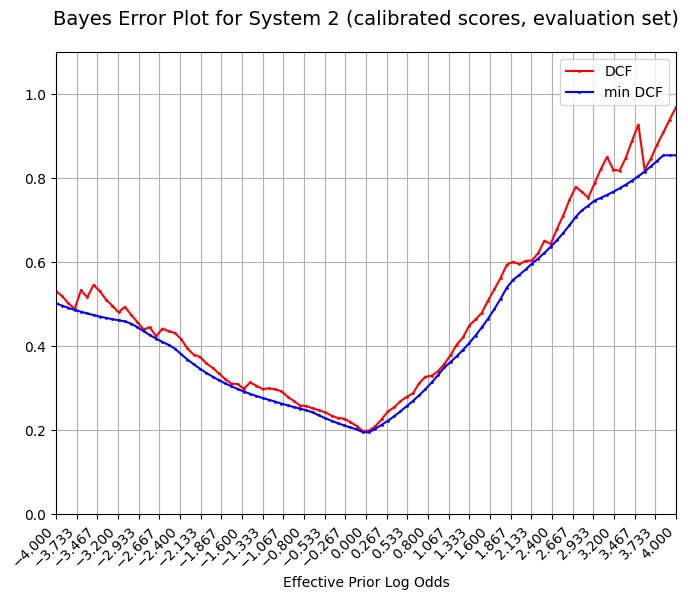

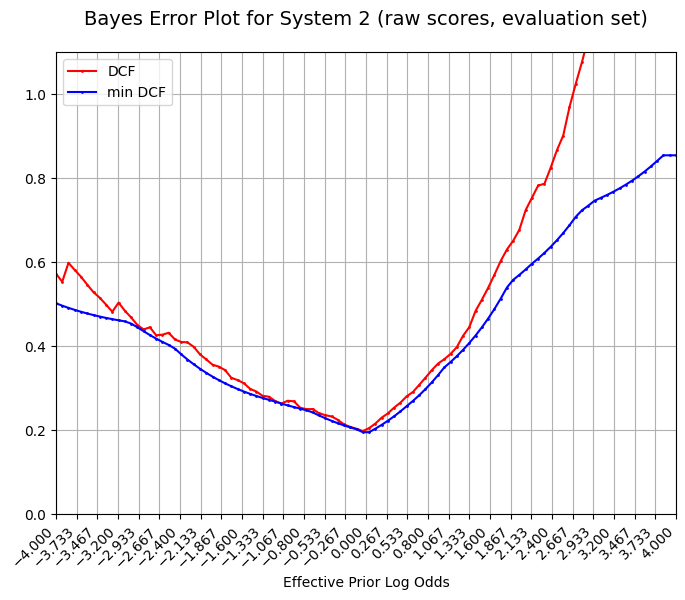

In [48]:
# CALIBRATION ON EVAL SET FOR SYSTEM 2
#load evaluation set scores
scores_eval_2 = np.load("./Data/eval_scores_2.npy")
print(f"Shape of scores_eval_2: {scores_eval_2.shape}")
#apply the model on evaluation set
calibrated_EVAL_scores_2 = (alpha_2 @ vrow(scores_eval_2) + beta_2 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#compute DCF for the calibrated scores on evaluation set
DCF_eval_2 = computeEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_2, labels_eval, pT, 1.0, 1.0)
print(f"DCF for System 2 (calibrated scores, evaluation set): {DCF_eval_2:.3f}")
minDCF_eval_2 = computeMinEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_2, labels_eval, pT, 1.0, 1.0)
print(f"minDCF for System 2 (calibrated scores, evaluation set): {minDCF_eval_2:.3f}")
#bayes error plot for calibrated scores of system 2 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, calibrated_EVAL_scores_2, labels_eval, title="Bayes Error Plot for System 2 (calibrated scores, evaluation set)")
#bayes error plots of raw scores on evaluation set
plotBayesErrorPlots(effPriorLogOdds, scores_eval_2, labels_eval, title="Bayes Error Plot for System 2 (raw scores, evaluation set)")

We can
observe that our calibration was not effective for system 2, and actually cost us almost 10% more than
using the raw scores directly. For system 1, on the other hand, our approach was effective.
